## ARBOL DE DECISION

### KATERINE TAPIA

In [48]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [52]:
# Cargar el dataset
data = pd.read_csv('calidaddevino.csv')

In [56]:
# Paso 1: Análisis exploratorio de datos
print("Información del Dataset:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Información del Dataset:
 None


In [58]:
print("\nEstadísticas descriptivas:\n", data.describe())


Estadísticas descriptivas:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000 

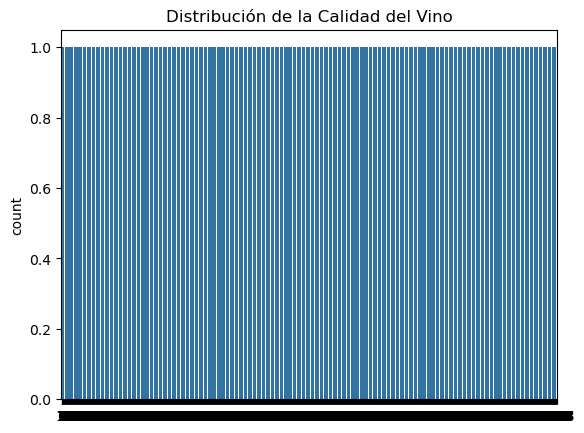

In [61]:
# Distribución de la variable objetivo
sns.countplot(data['quality'])
plt.title('Distribución de la Calidad del Vino')
plt.show()

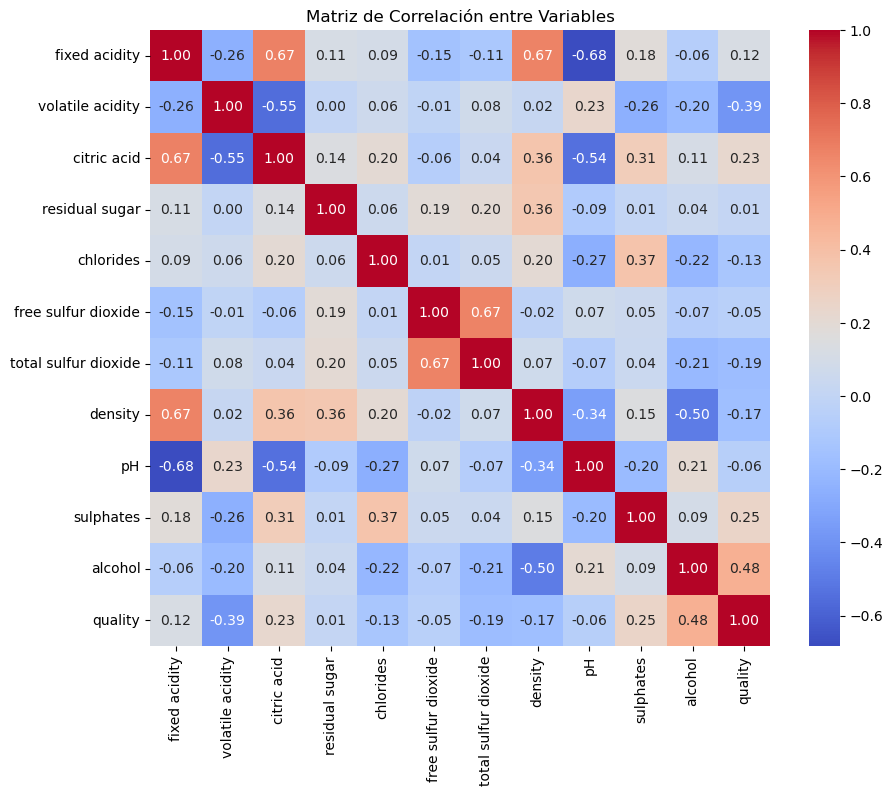

In [71]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables')
plt.show()

In [73]:
# Paso 2: Preprocesamiento de datos
# Normalización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns='quality'))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])

In [75]:
# Paso 3: Selección de características
# Selección de las mejores características usando SelectKBest
X = data_scaled
y = data['quality']
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')


In [79]:
# Paso 4: División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [122]:
# Paso 5: Entrenamiento del modelo
# Creación y entrenamiento del modelo de árbol de decisión
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=20, min_samples_leaf=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=20,
                       random_state=42)

In [98]:
# Predicción en el conjunto de prueba
y_pred = tree_model.predict(X_test)

In [104]:
print("Distribución de clases en y_train:\n", y_train.value_counts())
print("Distribución de clases en y_test:\n", y_test.value_counts())

Distribución de clases en y_train:
 quality
5    486
6    438
7    138
4     36
8     12
3      9
Name: count, dtype: int64
Distribución de clases en y_test:
 quality
6    200
5    195
7     61
4     17
8      6
3      1
Name: count, dtype: int64


In [106]:
# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=1))

Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.74      0.67       195
           6       0.51      0.54      0.53       200
           7       0.44      0.26      0.33        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.26      0.26      0.25       480
weighted avg       0.52      0.56      0.53       480

Matriz de Confusión:
 [[  0   0   1   0   0   0]
 [  0   0   8   9   0   0]
 [  0   0 144  49   2   0]
 [  0   0  77 108  15   0]
 [  0   0   4  41  16   0]
 [  0   0   0   3   3   0]]
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        17
           5       0.62      0.74      0.67       195
           6       0.51     

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


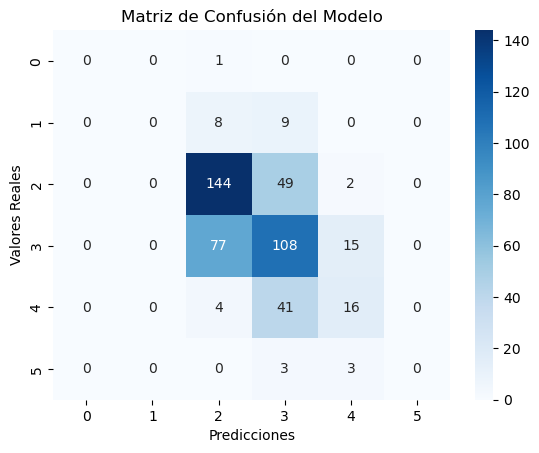

In [108]:
# Paso 7: Visualización de resultados
# Gráfico de matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusión del Modelo')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

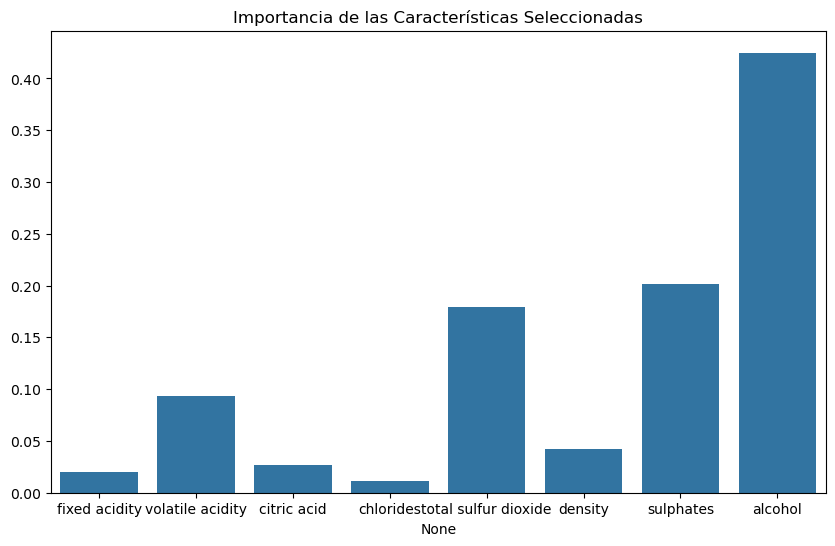

In [110]:
# Importancia de las características
plt.figure(figsize=(10, 6))
feature_importances = tree_model.feature_importances_
sns.barplot(x=selected_features, y=feature_importances)
plt.title('Importancia de las Características Seleccionadas')
plt.show()

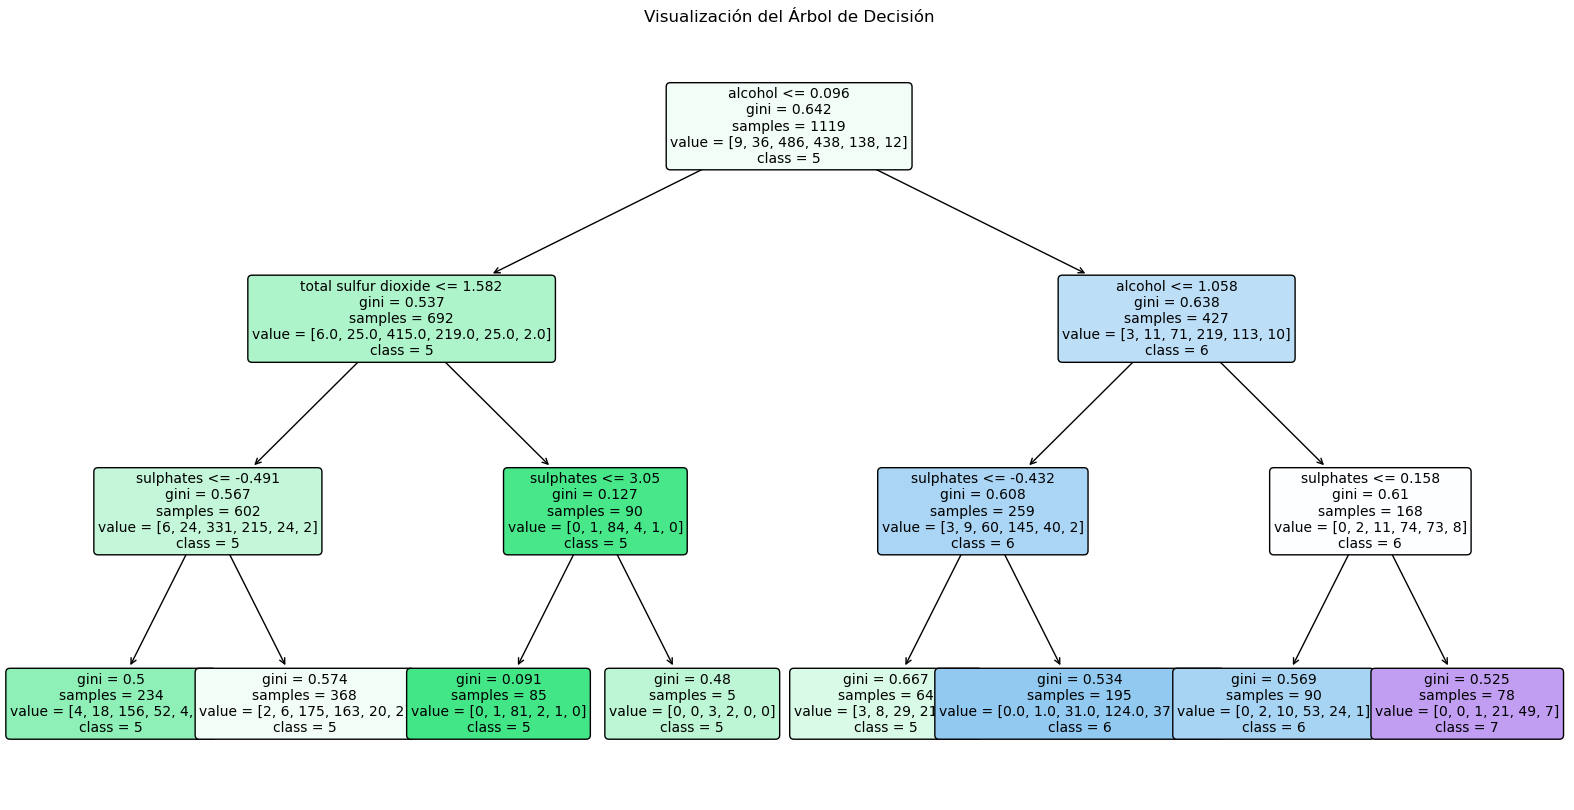

In [124]:
# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=selected_features, 
          class_names=[str(c) for c in tree_model.classes_], 
          filled=True, rounded=True, fontsize=10)
plt.title("Visualización del Árbol de Decisión")
plt.show()

### Interpretación de Resultados:
### - La precisión y otras métricas en el reporte de clasificación muestran el desempeño general del modelo.
### - La matriz de confusión ayuda a entender cómo el modelo clasifica cada clase de calidad.
### - El gráfico de importancia de características revela cuáles atributos son más influyentes en la predicción de la calidad del vino.